### Example analysis

In [1]:
# This allows us to manually edit the code and have it reflected in this notebook
%load_ext autoreload
%autoreload 2

In [203]:
# import everything we need

import json # to prettyprint ordereddict

import numpy as np
import pandas as pd # using pd.__version__ == 0.24.2, There are newer versions and things might break!!!

print('pd.__version__:', pd.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, clear_output
import ipywidgets

from samiPostAnalysis import samiPostAnalysis

pd.__version__: 1.0.5


### Create a samiPostAnalysis object with all of our sekelton analysis across groups (wtf, wtm, kof, kom)

This assumes eveything has been processed with samiAnalysis.py

In particular

```
wtfPath = '../analysis/wt-female_results.csv'
kofPath = '../analysis/ko-female_results.csv'
wtmPath = '../analysis/wt-male_results.csv'
komPath = '../analysis/ko-male_results.csv'
```


In [204]:
resultsPath = '/Users/cudmore/Desktop/samiVolume1'
#resultsPath = '/Users/cudmore/Desktop/samiVolume2'
resultsPath = '/Users/cudmore/Desktop/samiVolume3'

spa = samiPostAnalysis(resultsPath)

samiPostAnalysis() is loading analysis files
    loading: /Users/cudmore/Desktop/samiVolume3/wt-female_results.csv
    loading: /Users/cudmore/Desktop/samiVolume3/ko-female_results.csv
    loading: /Users/cudmore/Desktop/samiVolume3/wt-male_results.csv
    loading: /Users/cudmore/Desktop/samiVolume3/ko-male_results.csv
    loading densityResultsPath: /Users/cudmore/Desktop/samiVolume3/density-results.csv


### Throughout this analysis we will be using a 'pruneDict' to specify the data to pull from the raw analysis.

Fetch a default pruneDict with

```
pruneDict = spa.getDefaultPruneDict()
```

'genotype': in ('wt', 'ko')
'sex': in ('male', 'female')
'branchType' : specifies branch type as xxx

In [163]:
pruneDict = spa.getDefaultPruneDict()
print(json.dumps(pruneDict, indent=4))


{
    "genotype": [],
    "sex": [],
    "branchType": [
        2
    ],
    "useRemove": true,
    "statName": "len3d",
    "minValue": 1,
    "doCellMean": false,
    "statTest": "Mann-Whitney",
    "nPick": null
}


### Here is a snapshot of the df we are working with (from samiAnalysis)

In [164]:
display(spa.df.head())
display(spa.df.tail())

Unnamed: 0  myCellNumber  \
0         0.0           0.0   
1         1.0           0.0   
2         2.0           0.0   
3         3.0           0.0   
4         4.0           0.0   

                                            saveBase               filename  \
0  /Users/cudmore/Desktop/samiVolume3/200108/WT_F...  1_5ADVMLEG1L1_ch2.tif   
1  /Users/cudmore/Desktop/samiVolume3/200108/WT_F...  1_5ADVMLEG1L1_ch2.tif   
2  /Users/cudmore/Desktop/samiVolume3/200108/WT_F...  1_5ADVMLEG1L1_ch2.tif   
3  /Users/cudmore/Desktop/samiVolume3/200108/WT_F...  1_5ADVMLEG1L1_ch2.tif   
4  /Users/cudmore/Desktop/samiVolume3/200108/WT_F...  1_5ADVMLEG1L1_ch2.tif   

  genotype     sex    xVoxel    yVoxel  zVoxel  branchType     len3d  \
0       wt  female  0.209253  0.209253    0.43         1.0  2.575107   
1       wt  female  0.209253  0.209253    0.43         1.0  0.690499   
2       wt  female  0.209253  0.209253    0.43         1.0  1.994908   
3       wt  female  0.209253  0.209253    0.43         2.0  1.556086   
4       wt  female  0.209253  0.209253    0.43         2.0  1.178658   

   euclideanDist  tortuosity  \
0       2.467170    1.043749   
1       0.690499    1.000000   
2       1.245800    1.601306   
3       1.401366    1.110406   
4       0.678506    1.737138   

                                                path  image_coord_src_0  \
0  ../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...               0.00   
1  ../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...               2.00   
2  ../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...               2.00   
3  ../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...               2.00   
4  ../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...               4.25   

   image_coord_src_1  image_coord_src_2  image_coord_dst_0  image_coord_dst_1  \
0         136.000000         364.000000           5.647059         136.764706   
1         118.666667         232.666667           2.000000         121.000000   
2         118.666667         232.666667           3.000000         117.000000   
3         118.666667         232.666667           4.250000         115.000000   
4         115.000000         229.500000           4.000000         113.000000   

   image_coord_dst_2  
0         365.941176  
1         235.000000  
2         238.000000  
3         229.500000  
4         227.000000

Unnamed: 0  myCellNumber  \
132245     50115.0          43.0   
132246     50116.0          43.0   
132247     50117.0          43.0   
132248     50118.0          43.0   
132249     50119.0          43.0   

                                                 saveBase  \
132245  /Users/cudmore/Desktop/samiVolume3/200421/BIN1...   
132246  /Users/cudmore/Desktop/samiVolume3/200421/BIN1...   
132247  /Users/cudmore/Desktop/samiVolume3/200421/BIN1...   
132248  /Users/cudmore/Desktop/samiVolume3/200421/BIN1...   
132249  /Users/cudmore/Desktop/samiVolume3/200421/BIN1...   

                             filename genotype   sex    xVoxel    yVoxel  \
132245  KO Male 9_3ADVMLEG1L1_ch2.tif       ko  male  0.089874  0.089874   
132246  KO Male 9_3ADVMLEG1L1_ch2.tif       ko  male  0.089874  0.089874   
132247  KO Male 9_3ADVMLEG1L1_ch2.tif       ko  male  0.089874  0.089874   
132248  KO Male 9_3ADVMLEG1L1_ch2.tif       ko  male  0.089874  0.089874   
132249  KO Male 9_3ADVMLEG1L1_ch2.tif       ko  male  0.089874  0.089874   

        zVoxel  branchType     len3d  euclideanDist  tortuosity  \
132245    0.43         0.0  0.829696       0.560480    1.480330   
132246    0.43         0.0  0.665367       0.538429    1.235756   
132247    0.43         0.0  0.887683       0.200965    4.417104   
132248    0.43         0.0  1.067432       0.370561    2.880582   
132249    0.43         0.0  0.216976       0.200965    1.079669   

                                                     path  image_coord_src_0  \
132245  ../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...               27.0   
132246  ../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...               27.0   
132247  ../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...               28.0   
132248  ../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...               29.0   
132249  ../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...               30.0   

        image_coord_src_1  image_coord_src_2  image_coord_dst_0  \
132245              243.0              271.0               28.0   
132246              272.0              411.0               28.0   
132247              321.0              480.0               28.0   
132248              314.0              471.0               29.0   
132249              287.0              418.0               30.0   

        image_coord_dst_1  image_coord_dst_2  
132245              247.0              271.0  
132246              274.0              408.0  
132247              323.0              481.0  
132248              315.0              475.0  
132249              288.0              420.0

### Per cell mean of ('female', 'male') len3d

In [165]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1 # only inlude branch length >= 2
pruneDict['branchType'] = [1,2] # brancType==2 are branches connected on both ends
dfCount = spa.getCounts(pruneDict)
display(dfCount)

# set up a pruneDict to specify what we want
pruneDict = spa.getDefaultPruneDict()
pruneDict['sex'] = ['male']
pruneDict['statName'] = 'len3d'

print('resultsPath:', spa.resultsPath)

dfCount = spa.getCounts(pruneDict)
display(dfCount)

# get the per cell mean
dfCellMean = spa.getCellMean(pruneDict, verbose=False)

# display results
display(dfCellMean)

genotype     sex   nRaw  nCell
0       wt  female  12031     22
1       wt    male  23190     44
2       ko  female  13952     24
3       ko    male  28892     40

resultsPath: /Users/cudmore/Desktop/samiVolume3


genotype     sex   nRaw  nCell
0       wt  female      0      0
1       wt    male  15897     44
2       ko  female      0      0
3       ko    male  20220     40

genotype   sex  myCellNumber      mean       std       sem  count
0        ko  male           4.0  1.908490  0.978295  0.043620    503
1        ko  male           5.0  2.075751  1.028743  0.029784   1193
2        ko  male           6.0  2.301236  1.308613  0.090303    210
3        ko  male           7.0  2.284604  1.348962  0.066138    416
4        ko  male           8.0  1.864281  0.912290  0.031127    859
..      ...   ...           ...       ...       ...       ...    ...
79       wt  male          39.0  2.382916  1.224777  0.057355    456
80       wt  male          40.0  1.954545  1.103072  0.053133    431
81       wt  male          41.0  2.218287  1.231473  0.085387    208
82       wt  male          42.0  2.267757  1.238605  0.059387    435
83       wt  male          43.0  2.016126  1.127221  0.058209    375

[84 rows x 7 columns]

In [166]:
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="darkgrid")

### Plot all raw data.

Problem here is each cell has different number of branches and we are not weighing the contribution of each cell...

/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'\nplt.close(2);\nplt.close(3);\nplt.close(4);\nplt.close(5);\n'

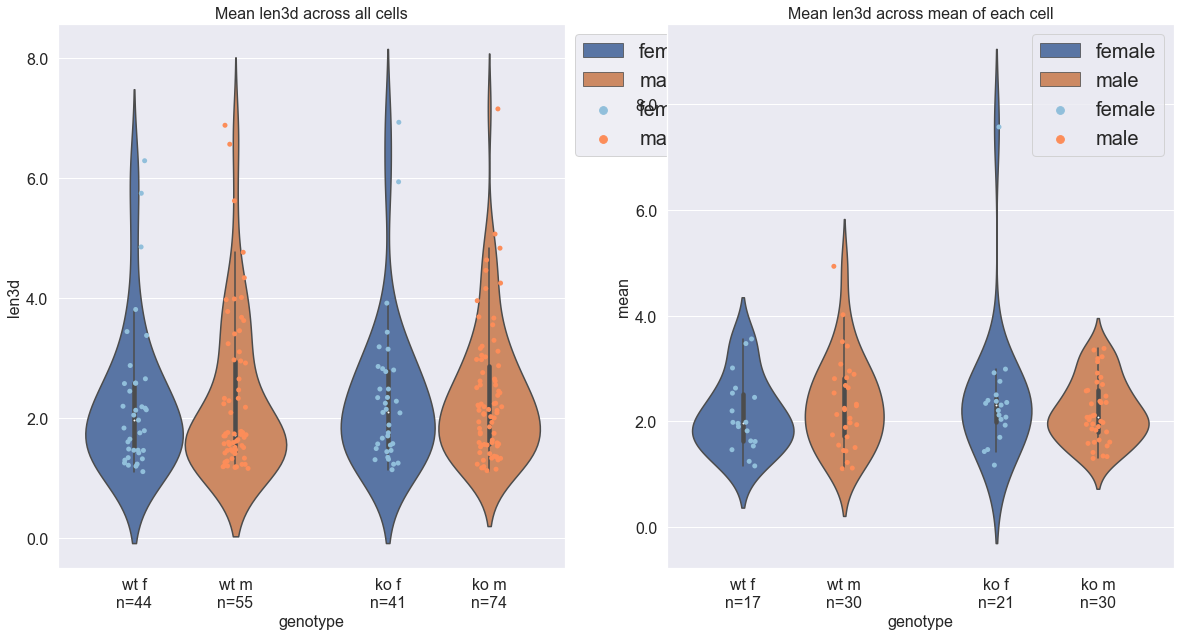

In [214]:
#fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,10))
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(20,10));
axs = np.ravel(axs) # flatten into 1D

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 1.1 # only inlude branch length >= 2
pruneDict['branchType'] = [1,2] # brancType==2 are branches connected on both ends

pruneDict['nPick'] = 214 #140 ### FROM BELOW ##

# branch length across all cells (does not weight cells with low number or high number of branches)
ax = axs[0]
g1 = spa.plotCondMean(pruneDict, doCellMean=False, ax=ax);

# this can't be done in plotCondMean() ???
#spa.plotCondMeanLegend(ax)
'''
xAxisLabels = ['wt f\nn=xxx', 'wt m\nn=xxx', 'ko f\nn=xxx', 'ko m\nn=xxx']
ax.set_xticks([-0.2,0.2, 0.8,1.2])
ax.set_xticklabels(xAxisLabels)
'''

# branch length per cell
ax = axs[1]
g2 = spa.plotCondMean(pruneDict, doCellMean=True, ax=axs[1]);
# show the plots
#plt.show()

# this is a bug in seaborn, we were getting spurious empy figure ax
# see:
#     https://github.com/mwaskom/seaborn/issues/1583
#     https://github.com/mwaskom/seaborn/issues/1514
"""
plt.close(2);
plt.close(3);
plt.close(4);
plt.close(5);
"""

### Histograms to compare groups, e.g. wtf vs wtm

minNumBranches: 140
56 ko male minNumBranches: 140 samiVolume3/200421/BIN1smKO Male/Cell 2/KO Male 2_3ADVMLEG1L1_ch2
77 wt female minNumBranches: 196 samiVolume3/200421/WT Female/Cell 2/Female WT cell 2_3ADVMLEG1L1_ch2
86 wt male minNumBranches: 189 samiVolume3/191230/WT_Male/Cell_4_/4_1_5ADVMLEG1L1_ch2
87 wt male minNumBranches: 199 samiVolume3/191230/WT_Male/Cell_6_/6_5ADVMLEG1L1_ch2
88 wt male minNumBranches: 157 samiVolume3/191230/WT_Male/Cell_7/7_5ADVMLEG1L1_ch2
89 wt male minNumBranches: 153 samiVolume3/191230/WT_Male/Cell_8/8_5ADVMLEG1L1_ch2
90 wt male minNumBranches: 163 samiVolume3/191230/WT_Male/Cell_9/9_5ADVMLEG1L1_ch2


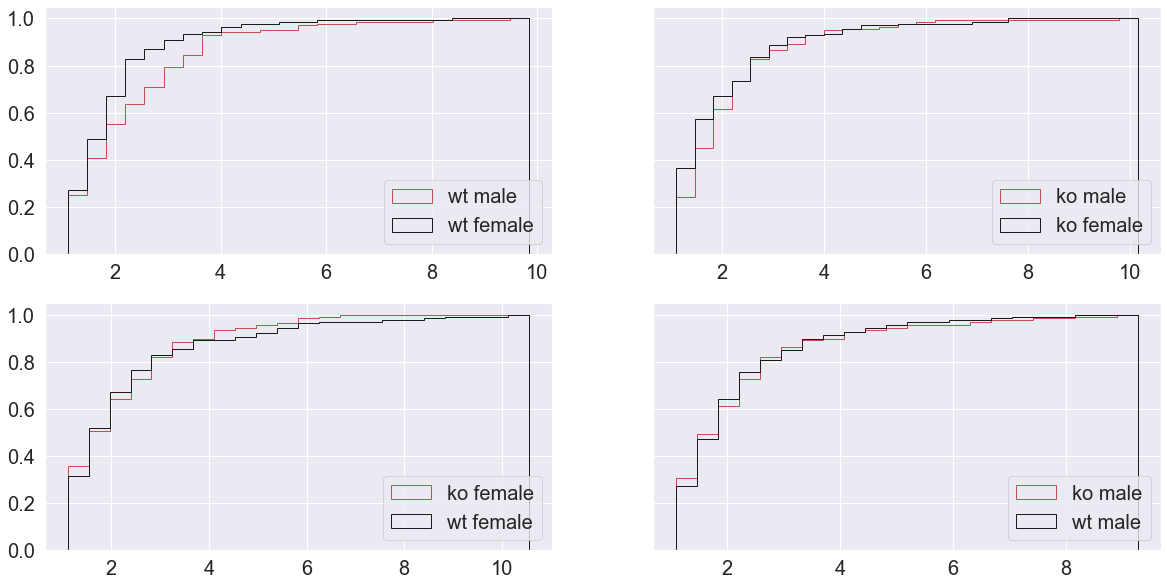

In [215]:
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(20,10))
axs = np.ravel(axs) # flatten

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 1.1 # only inlude branch length >= 2
pruneDict['branchType'] = [1,2] # brancType==2 are branches connected on both ends

dfPerCellMean = dfCellMean = spa.getCellMean(pruneDict, verbose=False)
minNumBranches = dfPerCellMean['count'].min()
print('minNumBranches:', minNumBranches)
for rowIdx in range(dfPerCellMean.shape[0]):
    thisRow = dfPerCellMean.iloc[rowIdx]
    thisNumBranches = thisRow['count']
    if thisNumBranches < 200:
        genotype = thisRow['genotype']
        sex = thisRow['sex']
        myCellNumber = thisRow['myCellNumber'] # not unique
        tmpRows = spa.df[(spa.df['genotype']==genotype) & (spa.df['sex']==sex) & (spa.df['myCellNumber']==myCellNumber)]
        mainRow = tmpRows.iloc[0] # although we have a sub list of rows, iloc refers to original?
        saveBase = mainRow['saveBase']
        saveBase = saveBase.replace('/Users/cudmore/Desktop/', '')
        print(rowIdx, genotype, sex, 'minNumBranches:', thisNumBranches, saveBase)

pruneDict['nPick'] = minNumBranches

doCumulative = True

# 0
ax = axs[0]
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, doCumulative=doCumulative, ax=ax)

# 1
ax = axs[1]
pruneDict['genotype'] = ['ko']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, doCumulative=doCumulative, ax=ax)

# 2
ax = axs[2]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['female']
spa.plotHist(pruneDict=pruneDict, doCumulative=doCumulative, ax=ax)

# 3
ax = axs[3]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['male']
spa.plotHist(pruneDict=pruneDict, doCumulative=doCumulative, ax=ax)


## 202006 get count per cell and plots as hist

In [9]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['sex'] = ['female']
pruneDict['statName'] = 'len3d'

# get the per cell mean
dfCellMean = spa.getCellMean(pruneDict, verbose=False)

# display results
display(dfCellMean)

genotype     sex  myCellNumber      mean       std       sem  count
0        ko  female           0.0  2.376396  1.539889  0.075228    419
1        ko  female           1.0  2.343479  1.438675  0.056780    642
2        ko  female           2.0  2.249347  1.262857  0.047461    708
3        ko  female           3.0  2.462582  1.420374  0.061755    529
4        ko  female           4.0  2.316973  1.212542  0.053640    511
5        ko  female           5.0  2.240983  1.224369  0.079700    236
6        ko  female           6.0  2.182499  1.087970  0.072371    226
7        ko  female           7.0  2.192860  1.131939  0.060247    353
8        ko  female           8.0  2.730404  1.895822  0.097900    375
9        ko  female           9.0  2.178571  1.249080  0.062454    400
10       ko  female          10.0  2.300771  1.349185  0.076629    310
11       ko  female          11.0  2.271931  1.395452  0.085082    269
12       ko  female          12.0  2.275646  1.286930  0.079355    263
13       ko  female          13.0  2.630162  1.765305  0.124515    201
14       ko  female          14.0  2.231085  1.262907  0.067602    349
15       ko  female          15.0  2.337863  1.780026  0.109346    265
16       ko  female          16.0  2.273784  1.300297  0.051041    649
17       ko  female          17.0  2.268906  1.352513  0.075845    318
18       ko  female          18.0  2.675844  1.730301  0.111690    240
19       ko  female          19.0  2.654943  1.682959  0.097004    301
20       ko  female          20.0  2.362037  1.470401  0.061697    568
21       ko  female          21.0  2.505508  1.631599  0.084823    370
22       ko  female          22.0  2.786175  1.883857  0.113808    274
23       ko  female          23.0  2.739661  1.809388  0.090583    399
24       wt  female           0.0  2.505683  1.528108  0.074653    419
25       wt  female           1.0  2.292221  1.416961  0.066283    457
26       wt  female           2.0  2.283759  1.283721  0.083741    235
27       wt  female           3.0  2.348231  1.171103  0.060395    376
28       wt  female           4.0  2.365785  1.373643  0.072498    359
29       wt  female           5.0  2.313288  1.177030  0.044142    711
30       wt  female           6.0  2.163878  1.147788  0.044310    671
31       wt  female           7.0  2.543405  1.553864  0.065372    565
32       wt  female           8.0  2.334000  1.318492  0.058730    504
33       wt  female           9.0  2.436359  1.421650  0.081270    306
34       wt  female          10.0  2.387122  1.524710  0.085502    318
35       wt  female          11.0  2.107068  1.155753  0.059524    377
36       wt  female          12.0  2.444180  1.401798  0.067838    427
37       wt  female          13.0  2.259121  1.388712  0.140281     98
38       wt  female          14.0  2.416174  1.489997  0.071276    437
39       wt  female          15.0  2.027405  1.066157  0.045923    539
40       wt  female          16.0  2.326760  1.250328  0.083541    224
41       wt  female          17.0  2.193900  1.147666  0.083480    189
42       wt  female          18.0  2.554663  1.558702  0.103455    227
43       wt  female          19.0  2.302653  1.291118  0.055925    533
44       wt  female          20.0  2.386431  1.558427  0.083782    346
45       wt  female          21.0  2.566309  1.314067  0.085538    236

# Stats

### Table of cell means

In [11]:
pruneDict = spa.getDefaultPruneDict()
#pruneDict['genotype'] = ['wt']
#pruneDict['sex'] = ['male']
pruneDict['branchType'] = [1, 2]
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1

cellMean = spa.getCellMean(pruneDict)

display(cellMean.head())
display(cellMean.tail())


genotype     sex  myCellNumber      mean       std       sem  count
0       ko  female           0.0  2.416648  1.627927  0.068792    560
1       ko  female           1.0  2.319100  1.399256  0.049471    800
2       ko  female           2.0  2.254910  1.294362  0.041907    954
3       ko  female           3.0  2.351193  1.385427  0.053404    673
4       ko  female           4.0  2.315031  1.205463  0.046994    658

genotype   sex  myCellNumber      mean       std       sem  count
129       wt  male          39.0  2.608560  1.553731  0.062050    627
130       wt  male          40.0  2.238137  1.322616  0.048986    729
131       wt  male          41.0  2.779782  1.903979  0.096412    390
132       wt  male          42.0  2.553154  1.512320  0.056012    729
133       wt  male          43.0  2.310197  1.327836  0.053156    624

### Pairwise stas for each cell

This is breaking the rules with repeated statistical tests. This is only used for quality control to make sure cell within a condition (like wt-female) do not **ALL** come up statistically different.

In [12]:
# getPairwiseCellComparison() requires one [genotype] and one [sex]

pruneDict = spa.getDefaultPruneDict()
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['male']
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 2
pruneDict['branchType'] = [1, 2]

# p-value matrix
prob = spa.getPairwiseCellComparison(pruneDict)

display(prob)

cells         0         1         2          3          4          5  \
0       0  0.999578  0.791413  0.426229  0.0747559   0.057382    0.19078   
1       1            0.999229  0.620617  0.0577265  0.0354389   0.154013   
2       2                      0.999398  0.0136326  0.0100639  0.0643025   
3       3                                 0.999627   0.548907   0.699978   
4       4                                            0.998734    0.36115   
5       5                                                       0.999564   
6       6                                                                  
7       7                                                                  
8       8                                                                  
9       9                                                                  
10     10                                                                  
11     11                                                                  
12     12                                                                  
13     13                                                                  
14     14                                                                  
15     15                                                                  
16     16                                                                  
17     17                                                                  
18     18                                                                  
19     19                                                                  
20     20                                                                  
21     21                                                                  
22     22                                                                  
23     23                                                                  
24     24                                                                  
25     25                                                                  
26     26                                                                  
27     27                                                                  
28     28                                                                  
29     29                                                                  
30     30                                                                  
31     31                                                                  
32     32                                                                  
33     33                                                                  
34     34                                                                  
35     35                                                                  
36     36                                                                  
37     37                                                                  
38     38                                                                  
39     39                                                                  
40     40                                                                  
41     41                                                                  
42     42                                                                  
43     43                                                                  

            6         7            8  ...          34           35  \
0     0.79348  0.132976    0.0148499  ...    0.874965     0.332992   
1    0.604024   0.10766    0.0591316  ...     0.89023     0.552922   
2    0.296417  0.026187     0.183008  ...    0.441877     0.994946   
3    0.163986  0.724238  4.02519e-06  ...   0.0450012   0.00232092   
4   0.0885024  0.400145  4.92859e-05  ...    0.032755   0.00394778   
5    0.368773  0.946237  0.000150151  ...    0.142409    0.0188462   
6    0.999464  0.236693   0.00856276  ...    0.692518     0.228713   
7              0.999665

## Group means

### This is the most important part, we can compare significant difference between groups while varying the analysis parameters.

```
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
```

### Here we can calculate group means (e.g. wtf, wtm, kof, kom) across all measurements or by taking the main of mean within cells using doCellMean=True.

In [14]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1, 2]
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')

# this pools all measurements across all cells (does not use mean within a cell)
#print('Lumping all measurements across cells. Cell with more measurements contribute more !!!')
#df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=False)

#display(df1)
#display(df2)

# this pools across the mean within each cell. 
print('Stats based on the "mean" from each cell')
df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)

display(df1)
display(df2)


Stats based on the "mean" from each cell


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.990629   0.147434     0.684144    0.410539
1    (wt, male)                 0.99667     0.460571    0.440149
2  (ko, female)                             0.991769    0.892811
3    (ko, male)                                         0.996670

name      mean       std       sem   n     f         p
0   (wt, female)  2.357763  0.137085  0.029914  22                
1   (wt, female)  2.357763  0.137085  0.029914  22   242  0.990629
2   (wt, female)  2.357763  0.137085  0.029914  22                
3     (wt, male)  2.449115  0.203117  0.030975  44   377  0.147434
4   (wt, female)  2.357763  0.137085  0.029914  22                
5   (ko, female)  2.426063  0.199523  0.041604  24   245  0.684144
6   (wt, female)  2.357763  0.137085  0.029914  22                
7     (ko, male)  2.410979  0.194205  0.029616  44   423  0.410539
8     (wt, male)  2.449115  0.203117  0.030975  44                
9     (wt, male)  2.449115  0.203117  0.030975  44   968   0.99667
10    (wt, male)  2.449115  0.203117  0.030975  44                
11  (ko, female)  2.426063  0.199523  0.041604  24   586  0.460571
12    (wt, male)  2.449115  0.203117  0.030975  44                
13    (ko, male)  2.410979  0.194205  0.029616  44  1061  0.440149
14  (ko, female)  2.426063  0.199523  0.041604  24                
15  (ko, female)  2.426063  0.199523  0.041604  24   288  0.991769
16  (ko, female)  2.426063  0.199523  0.041604  24                
17    (ko, male)  2.410979  0.194205  0.029616  44   539  0.892811
18    (ko, male)  2.410979  0.194205  0.029616  44                
19    (ko, male)  2.410979  0.194205  0.029616  44   968   0.99667

### Compare different analysis parameters

In [15]:

# just use cell mean. If we don't, cells get weighted different based on number of branches

pruneDict = spa.getDefaultPruneDict()
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')
pruneDict['statName'] = 'len3d'

wtf_vs_wtm = [] # collect p-values for each run

print('branchType=[2]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
df1a, df2a = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1a)
display(df1n)

# b
print('branchType=[]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1, 2]
df1b, df2b = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1b)
display(df1n)


branchType=[2]


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.990629   0.279523     0.869003    0.324048
1    (wt, male)                 0.99667     0.500476    0.704159
2  (ko, female)                             0.991769    0.743482
3    (ko, male)                                         0.996670

genotype     sex   nRaw  nCell
0       wt  female   8554     22
1       wt    male  15516     44
2       ko  female   9175     24
3       ko    male  18905     44

branchType=[]


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.990629   0.147434     0.684144    0.410539
1    (wt, male)                 0.99667     0.460571    0.440149
2  (ko, female)                             0.991769    0.892811
3    (ko, male)                                         0.996670

genotype     sex   nRaw  nCell
0       wt  female  11804     22
1       wt    male  22095     44
2       ko  female  13397     24
3       ko    male  27302     44

In [218]:
# move this up
from ipywidgets import Layout, Button, Box

branchTypeList = [[], [0], [1], [2], [3], [1,2]]

global df1a, df2a, df1n, df2n

pruneDict1 = spa.getDefaultPruneDict()
pruneDict1['branchType'] = []
pruneDict1['minValue'] = 0
#pruneDict1['nPick'] = minNumBranches
df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
df1n = spa.getCounts(pruneDict1, asDict=False)
#
pruneDict2 = spa.getDefaultPruneDict()
pruneDict2['branchType'] = []
pruneDict2['minValue'] = 0
df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
df2n = spa.getCounts(pruneDict2, asDict=False)

# not sure why this behavior, variable declared global can be used inside function def()
#global branchType_Dropdown1, minValue_FloatSlider1

# put controls in an H Box layout
myHBoxLayout1 = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid 1px',
                    width='50%')

#
# 1
branchTypeName1 = 'Branch Type 1'
style = {'description_width': 'initial'}
branchType_Dropdown1 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName1,
)

minValue1 = 'Min Value 1'
minValue_FloatSlider1 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValue1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown1, minValue_FloatSlider1]
hBox1 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

#
# 2
branchTypeName2 = 'Branch Type 2'
style = {'description_width': 'initial'}
branchType_Dropdown2 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName2,
)

minValueName2 = 'Min Value 2'
minValue_FloatSlider2 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValueName2,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown2, minValue_FloatSlider2]
hBox2 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

def myDisplay():
    display(df1a)
    display(df1n)
    display(hBox1)
    #display(branchType_Dropdown1)
    #display(minValue_FloatSlider1)
    #
    display(df2a)
    display(df2n)
    display(hBox2)
    #display(branchType_Dropdown2)
    #display(minValue_FloatSlider2)
    
def on_change(change):
    global df1a, df2a, df1n, df2n
    if change['type'] == 'change' and change['name'] == 'value':
        #print('change:', change)
        #print('=== change["owner"].description:', change["owner"].description)
        #print('changed to:', change['new'], type(change['new']))
        newValue = change['new'] # can be (str, float)
        description = change["owner"].description
        #print('description:', description)
        
        # 1
        if description == branchTypeName1:
            pruneDict1['branchType'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()
        elif description == minValue1:
            pruneDict1['minValue'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()

        # 2
        elif description == branchTypeName2:
            pruneDict2['branchType'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()
        elif description == minValueName2:
            pruneDict2['minValue'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()

# 1
branchType_Dropdown1.observe(on_change)
minValue_FloatSlider1.observe(on_change)
# 2
branchType_Dropdown2.observe(on_change)
minValue_FloatSlider2.observe(on_change)

myDisplay()



/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.285518    0.88654     0.620759    0.652149
1    (wt, male)                0.652436     0.315185    0.389268
2  (ko, female)                             0.974534    0.773433
3    (ko, male)                                         0.570474

genotype     sex  nRaw  nCell
0       wt  female    24     16
1       wt    male    40     26
2       ko  female    26     17
3       ko    male    50     29

Box(children=(Dropdown(description='Branch Type 1', options=([], [0], [1], [2], [3], [1, 2]), style=Descriptio…

groups (wt, female) (wt, male) (ko, female)  (ko, male)
0  (wt, female)     0.990629   0.672414      0.14977    0.448642
1    (wt, male)                0.996554     0.211731    0.651903
2  (ko, female)                             0.991769    0.328243
3    (ko, male)                                         0.996160

genotype     sex   nRaw  nCell
0       wt  female  18335     22
1       wt    male  37163     43
2       ko  female  24056     24
3       ko    male  47353     40

Box(children=(Dropdown(description='Branch Type 2', options=([], [0], [1], [2], [3], [1, 2]), style=Descriptio…